<img src='images/Practicum_AI_Logo.white_outline.svg' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_python.png?raw=true' align='right' width=50>

***

# Additional Data Visualization Exercise

Much of the text and code in this notebook comes from the [Data Carpentry](https://datacarpentry.org/) lesson ["Making Plots With plotnine"](https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python.html). Data Carpentry and [The Carpentries](https://carpentries.org/) are a great source of learning materials.

In this lesson, we're going to be exploring some USDA data on energy use in agriculture [[1](#Citations)]. **Check out [the description of the data](https://data.nal.usda.gov/dataset/data-chapter-5-energy-use-agriculture-us-agriculture-and-forestry-greenhouse-gas-inventory-1990-2018) before continuing.**

It is probably also a good idea to **open a tab with the [`plotnine` documentation](https://plotnine.readthedocs.io/).**


## Grammar of Graphics

As noted on the `plotnine` website:

> plotnine is an implementation of a grammar of graphics in Python based on ggplot2.
> The grammar allows you to compose plots by explicitly mapping variables in a
> dataframe to the visual objects that make up the plot.
> 
> Plotting with a grammar of graphics is powerful. Custom (and otherwise complex) 
> plots are easy to think about and build incremently [sic], while the simple plots 
> remain simple to create.

<img src="images/gramar_of_graphics_thumbnail.png" align='right'> The Grammar of Graphics concept originated with Leland Wilkinson's [book by that name](https://link.springer.com/book/10.1007/0-387-28695-0), first published in 1999. The popular [R programming language](https://www.r-project.org/) package [`ggplot`](https://ggplot2.tidyverse.org/) was created by Hadley Wickham in 2005 as an implementation of Wilkinson's concepts.

The *Towards Data Science* article [Data Visualization — Grammar of Graphics](https://medium.com/aiskunks/data-visualization-grammar-of-graphics-fccf78379b52) by Swathi Sharma provides a good explanation of the tenets and structure of the Grammar of Graphics:


> ### Grammar vs Grammar of Graphics
>
> Grammar is described as a system of rules that aids in the definition and establishment
> of language components.
>
> Grammar of Graphics is a framework that allows us to explain the components of any visual 
> in a straightforward manner. Instead of random trials and errors, it employs a layered technique
> that use predetermined components to build a visualization
>
> Grammar of Graphics is a theory developed by Leland Wilkinson for visualizing and communicating
> data in a structured and coherent way. The Grammar of Graphics consists of a set of principles 
> and rules that guide the design of graphics for data visualization.
>
> The Grammar of Graphics is based on the idea that every graphic can be broken down into a series 
> of components or layers. These components include the data, the aesthetic mapping, the geometric 
> shapes, the statistical transformation, and the scales.
> 
> The data component refers to the raw data that is being visualized, while the aesthetic mapping 
> refers to the way that data is mapped to visual properties such as color, size, and shape. The geometric
> shapes component refers to the basic visual elements used to represent the data, such as points, lines, 
> and bars. The statistical transformation component refers to any calculations or analyses performed on 
> the data, such as aggregations or summaries. Finally, the scales component refers to the way that data 
> is transformed to fit within the visual space, such as scaling the axis.
>
> By breaking down graphics into these components, the Grammar of Graphics provides a systematic approach 
> to designing and interpreting data visualizations. It allows for greater flexibility in visualizing data,
> as well as a standardized way of communicating the design choices made in the creation of a graphic.
> 
> A variant of this, is known as the layered grammar of graphics framework, proposed by Hadley Wickham, 
> reputed Data Scientist and the creator of the famous R visualization package ggplot2.



## `plotnine` provides an API for plotting

An API, or Application Programming Interface, defines how two or more programs can communicate with eachother. `plotnine` is an API that communicates with `matplotlib`, the primary Python plotting library. Essentially, `plotnine` implements the Grammar of Graphics syntax and translates your `plotnine` commands into `matplotlib` code to create your graphics.

This may be our first encounter with APIs, but it will certainly not be our last--much of the code used in AI applications is using one or more APIs to communicate with other libraries to implement the tasks we want to accomplish.


## Let's get plotting!

Just as with the other packages, `plotnine` needs to be imported. It is good practice to not just load an entire package, such as `from plotnine import *`, but to use an abbreviation as we used `pd` for Pandas.

In [2]:
import pandas as pd
import plotnine as p9

## Load and examine the data

Now, let's load the data. We'll be loading in "Data for Figure 5-2: Energy use in agriculture, by source, 1965–2018 in QBTU (quadrillion British thermal units)". We've included a copy of this CSV file in the data folder.

In [3]:
file_path = 'data/Figure5_2.csv'
energy_data = pd.read_csv(file_path)

In [4]:
# Take a look at the data
energy_data.head()

,Year,Gasoline,Diesel,LP gas,Natural Gas,Electricity
0,1965,0.654,0.203,0.110,0.135,0.037
1,1966,0.604,0.230,0.111,0.140,0.039
2,1967,0.570,0.252,0.112,0.143,0.039
3,1968,0.572,0.265,0.113,0.146,0.042
4,1969,0.550,0.293,0.114,0.150,0.045


In [5]:
# Get some summary statistics
energy_data.describe()

,Year,Gasoline,Diesel,LP gas,Natural Gas,Electricity
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1991.500000,0.268656,0.425486,0.084745,0.089057,0.118187
std,15.732133,0.174705,0.088490,0.019747,0.038490,0.043400
min,1965.000000,0.094655,0.203000,0.052852,0.028000,0.037000
25%,1978.250000,0.133326,0.380630,0.070226,0.063056,0.099250
50%,1991.500000,0.184758,0.431500,0.080057,0.074699,0.118708
75%,2004.750000,0.431750,0.478755,0.099500,0.115750,0.145962
max,2018.000000,0.654000,0.612636,0.126000,0.173000,0.193559


## Plotting with `plotnine`

The `plotnine` package supports the creation of complex plots from data in a
DataFrame. It uses default settings, which help create publication-quality
plots with a minimal amount of settings and tweaking.

`plotnine` graphics are built step by step by adding different elements on 
top of each other using the `+` operator. Putting the individual steps 
together in parentheses `()` provides Python-compatible syntax.

To build a `plotnine` graphic, we need to:

- Bind the plot to a specific DataFrame using the `data` argument:


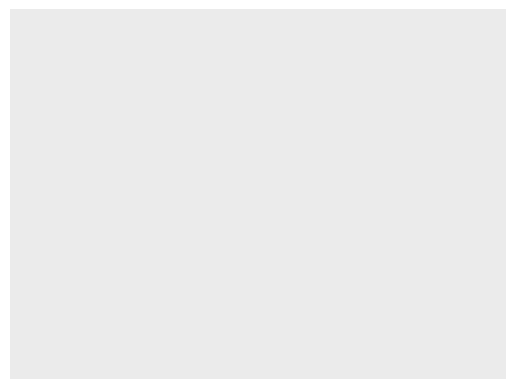

<ggplot: (1453121706409)>

In [7]:
(p9.ggplot(data=energy_data))

As we have not defined anything else, just an empty figure is available and
presented.

- Define aesthetics (`aes`) by **selecting variables** used in the plot and
`mapping` them to a presentation, such as plotting size, shape, color, etc. You
can interpret this as **which** of the variables will influence the plotted
objects/geometries:


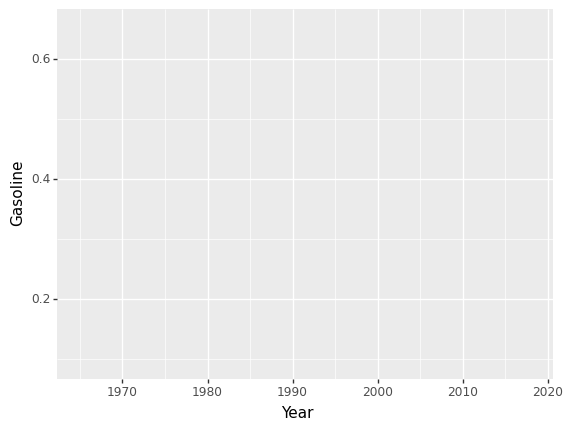

<ggplot: (1453113250901)>

In [8]:
(p9.ggplot(data=energy_data,
           mapping=p9.aes(x='Year', y='Gasoline')))

The most important aes mappings are: `x`, `y`, `alpha`, `color`, `fill`, 
`linetype`, `shape`, `size` and `stroke`.

- Still no specific data is plotted, as we have to define what kind of geometry
will be used for the plot. The most straightforward is probably using points.
Points is one of the `geom` options, the graphical representation of the data
in the plot. Others are lines, bars, and many more. To add a geom to the plot use the `+`
operator:

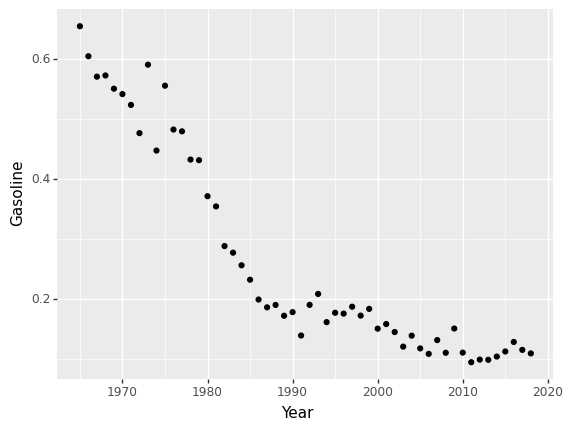

<ggplot: (1453113152362)>

In [10]:
(p9.ggplot(data=energy_data,
           mapping=p9.aes(x='Year', y='Gasoline'))
    + p9.geom_point()
)

The `+` in the `plotnine` package is particularly useful because it allows you
to modify existing `plotnine` objects. This means you can easily set up plot
*templates* and conveniently explore different types of plots, so the above
plot can also be generated with code like this:

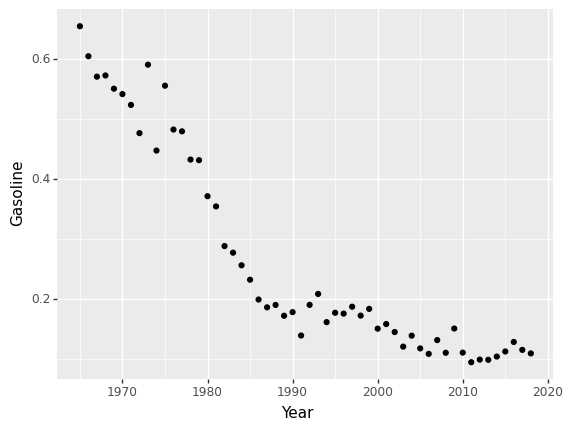

<ggplot: (1453113090910)>

In [11]:
# Create the base plot
gasoline_plot = p9.ggplot(data=energy_data,
                   mapping=p9.aes(x='Year', y='Gasoline'))

# Draw points on the plot
gasoline_plot + p9.geom_point()

### <img src='images/note_icon.svg' alt="Note icon" width=40 align=center> Note

- Anything you put in the `ggplot()` function can be seen by any geom layers
  that you add (i.e., these are universal plot settings). This includes the `x`
  and `y` axes you set up in `aes()`.
- You can also specify aesthetics for a given `geom` independently of the
  aesthetics defined globally in the `ggplot()` function.

### <img src='images/exercise_icon.svg' alt="Exercise icon" width=40 align=center> Exercise 1

> Make a plot similar to the Gasoline plot above but for one of the other energy sources.

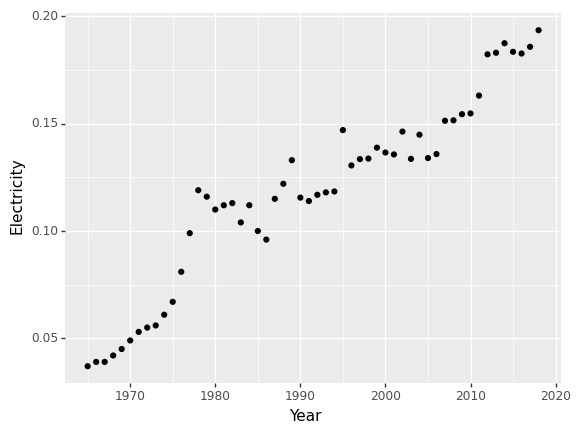

<ggplot: (1453113101231)>

In [15]:
# Add your code here
Electricity_plot = p9.ggplot(data=energy_data,
                    mapping=p9.aes(x='Year',y='Electricity'))

Electricity_plot + p9.geom_point()

# Building your plots iteratively

Building plots with `plotnine` is typically an iterative process. We start by
defining the dataset we'll use, lay the axes, and choose a geom. Hence, the
`data`, `aes` and `geom_*` are the elementary elements of any graph.

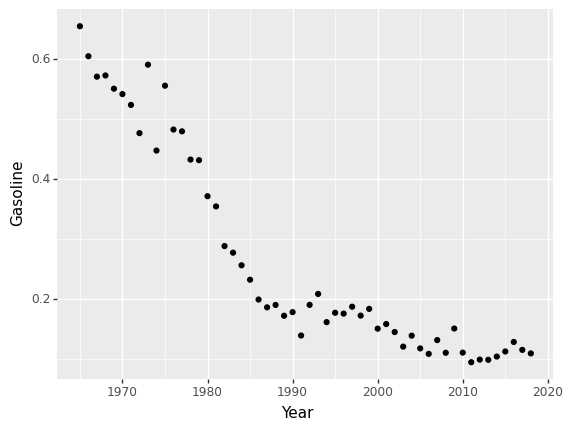

<ggplot: (1453112957898)>

In [16]:
(p9.ggplot(data=energy_data,
           mapping=p9.aes(x='Year', y='Gasoline'))
    + p9.geom_point()
)

Then, we start modifying this plot to add more information to it or improve its appearance. For
instance, we can add color to the points on our plot!

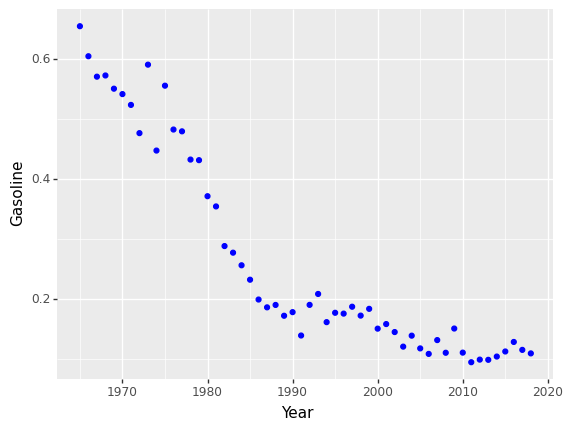

<ggplot: (1453112929509)>

In [17]:
(p9.ggplot(data=energy_data,
           mapping=p9.aes(x='Year', y='Gasoline'))
    + p9.geom_point(color='blue')
)

Maybe we want to try a different `shape` of point.

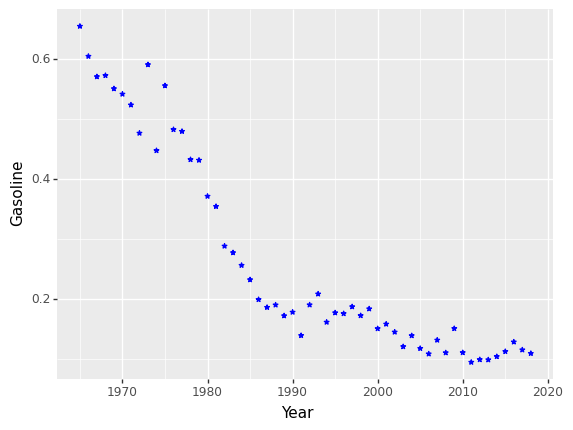

<ggplot: (1453112899886)>

In [18]:
(p9.ggplot(data=energy_data,
           mapping=p9.aes(x='Year', y='Gasoline'))
    + p9.geom_point(color='blue', shape='*')
)

Those stars are a bit small, let's change their `size`.

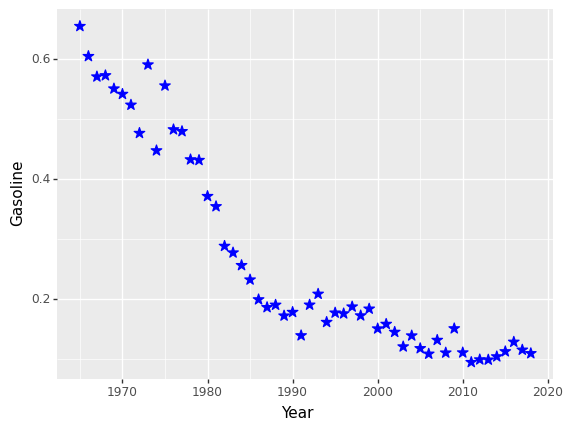

<ggplot: (1453112870970)>

In [19]:
(p9.ggplot(data=energy_data,
           mapping=p9.aes(x='Year', y='Gasoline'))
    + p9.geom_point(color='blue', shape='*', size=4)
)

## Plotting Multiple Columns of Data

For what we might want to do next (plot not just Gasoline or Diesel, but all of the different energy sources), the design of `plotnine` doesn't work particularly well with how our data are currently formatted.

`plotnine` cannot currently plot multiple `y` values or columns of data (there is some discussion of adding that ability in a future release). That doesn't mean we can't do it; it just means we need to transform our data a bit.

`pandas` has a helpful function that will get our DataFrame in a more suitable format for `plotnine`: the `melt` function. Here's the documentation for the melt function ([full documentation here](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)):

> Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
>
> This function is useful to massage a DataFrame into a format where one or more columns
> are identifier variables (id_vars), while all other columns, considered measured variables
> (value_vars), are "unpivoted" to the row axis, leaving just two non-identifier columns,
> 'variable 'va’

It's easier to see this in action....





In [20]:
# Current energy_data DataFrame
energy_data.head()

,Year,Gasoline,Diesel,LP gas,Natural Gas,Electricity
0,1965,0.654,0.203,0.110,0.135,0.037
1,1966,0.604,0.230,0.111,0.140,0.039
2,1967,0.570,0.252,0.112,0.143,0.039
3,1968,0.572,0.265,0.113,0.146,0.042
4,1969,0.550,0.293,0.114,0.150,0.045


In [21]:
# Use the melt function and make a long format DataFrame
# The columns become text values in the var_name column
# The corresponding values are placed in the value_name column

energy_data_long = pd.melt(energy_data, id_vars='Year', var_name='Energy Source', value_name='Consumption')
energy_data_long.head()

,Year,Energy Source,Consumption
0,1965,Gasoline,0.654
1,1966,Gasoline,0.604
2,1967,Gasoline,0.570
3,1968,Gasoline,0.572
4,1969,Gasoline,0.550


Now, we can go back to iterative plot development.

Let's start more or less where we ended, but update the command to use `data=energy_data_long` and `y='Consumption'`.

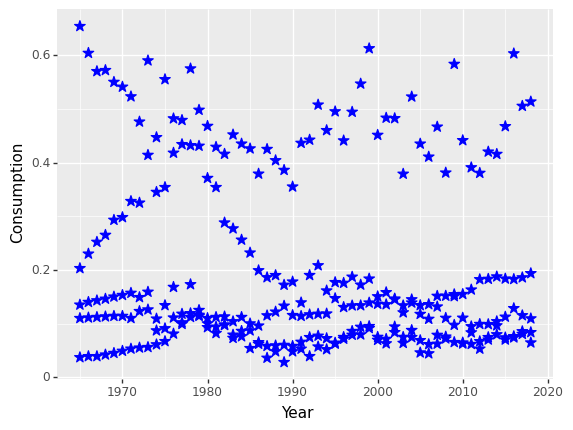

<ggplot: (1453112841885)>

In [22]:
(p9.ggplot(data=energy_data_long,
           mapping=p9.aes(x='Year', y='Consumption'))
    + p9.geom_point(color='blue', shape='*', size=4)
)

That worked, but it is a bit of a mess because everything is in the same blue color!

Luckily, `plotnine` is set to tackle that! We can move the `color` and `shape` parameters into `aes` to have different colors and shapes for each category in the Energy Source column.

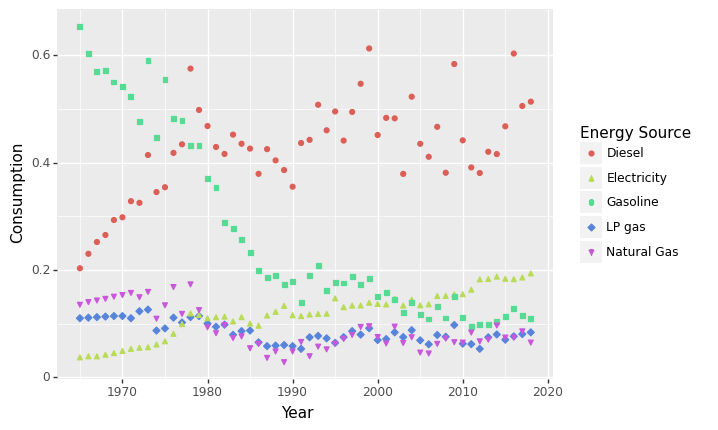

<ggplot: (1453112936596)>

In [23]:
(p9.ggplot(data=energy_data_long,
           mapping=p9.aes(x='Year', y='Consumption', 
                          color='Energy Source', 
                          shape='Energy Source'))
    + p9.geom_point()
)

Looking better!! `plotnine` even made a nice legend for us!

But, while points were a reasonable starting place, this plot might look better using lines.

That's a simple change: `geom_line` rather than `geom_point`.

In [ ]:
(p9.ggplot(data=energy_data_long,
           mapping=p9.aes(x='Year', y='Consumption', color='Energy Source'))
    + p9.geom_line()
)

### <img src='images/exercise_icon.svg' alt="Exercise icon" width=40 align=center> Exercise 2

This is looking good! 

There are a few more things we could do. Use the [`plotnine` documentation](https://plotnine.readthedocs.io) to:

* Add a plot title.
* Make the lines a bit thicker.
* Change the y-axis label to read "Energy Consumption (QBTU)"
* Anything else you want to explore!

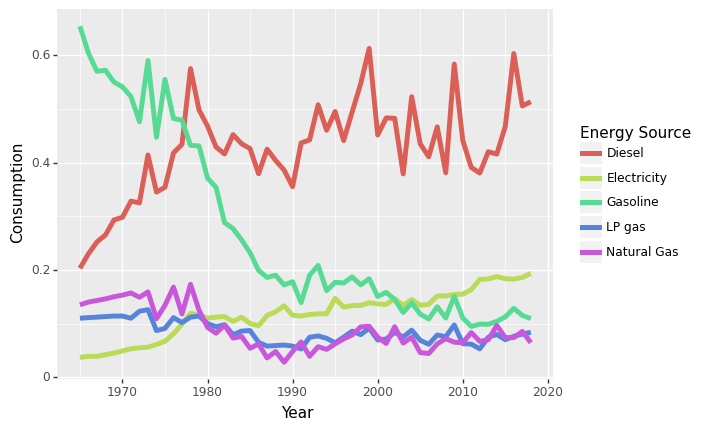

<ggplot: (1453107939259)>

In [45]:
# Add your code here
(p9.ggplot(energy_data_long,
           mapping=p9.aes(x='Year',y='Consumption', color='Energy Source'))
    + p9.geom_line(size=2)
)

And that's it! We encourage you to keep playing with code, and look out for more Practicum AI lessons!

----
## Push changes to GitHub <img src="images/push_to_github.png" alt="Push to GitHub icon" align="right" width=150>

 Remember to **add**, **commit**, and **push** the changes you have made to this notebook to GitHub to keep your repository in sync.

In Jupyter, those are done in the git tab on the left. In Google Colab, use File > Save a copy in GitHub.

----

## Citations

[1]
(original article) Xiarchos, I.M. (2022). Chapter 5: Energy Use in Agriculture. In U.S. Agriculture and Forestry Greenhouse Gas Inventory: 1990–2018. Technical Bulletin No. 1957, United States Department of Agriculture, Office of the Chief Economist, Washington, DC. p. 177-181. January 2022. Hanson, W.L., S.J. Del Grosso, L. Gallagher, Eds.

(dataset) Xiarchos, Irene M. (2021). Data from: Chapter 5: Energy Use in Agriculture. U.S. Agriculture and Forestry Greenhouse Gas Inventory: 1990-2018. Ag Data Commons. https://doi.org/10.15482/USDA.ADC/1524410. Accessed 2023-11-30.